# Analyzing DETE and TAFE Employee Resignations Based on Time With Institute and Age to Assess Dissatisfaction

This project will evaluate whether employees who only worked at their institute for a short period of time resign due to some kind of dissatisfaction or not, whether employees who have worked there longer resign due to dissatisfaction, and whether the age of employees resigning is related to dissatisfaction or not.  

### Summary of Results

After analyzing the data we can conclude that employees with more than 7 years of experience are more likely to resign due to dissatisfaction than those with less than 7 years. Employees younger than 26 are less likely to leave due to dissatisfaction.

## Exploring Existing Data
DETE (Department of Education, Training and Employment) and TAFE Technical and Further Education (TAFE) are both institutes in Queensland, Australia. They collected data on employee exit surveys that I am tasked with analyzing , but their survey was conducted with different questions which needs to be accounted for.

In [855]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [856]:
# Read in DETE data
dete_survey = pd.read_csv('dete_survey.csv')
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [857]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [858]:
# Read in TAFE data
tafe_survey = pd.read_csv('tafe_survey.csv')
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [859]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


DETE provides start date with the company, start date in their last role, and their last day. Some of the dates are listed as Not Stated instead of NaN. TAFE provides the year they left, overall years with the institute, and length of service at last workplace. DETE categorizes all reasons to leave in a single column, TAFE does have a column with all reasons to leave, but also has several columns dedicated to contributing factors.

## Find Missing Values and Drop Unnecessary Columns From DETE and TAFE Dataframes

This analysis is aimed at answering questions about dissatisfaction, time with company, and age so there are a lot of irrelevant columns I can delete. 

In [860]:
# Find all reasons for leaving DETE
dete_survey['SeparationType'].value_counts()

SeparationType
Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: count, dtype: int64

In [861]:
# Find all reasons for leaving TAFE
tafe_survey['Reason for ceasing employment'].value_counts()

Reason for ceasing employment
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: count, dtype: int64

In [862]:
# Read DETE survey again again reading 'Not Stated' values in as NaN instead
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [863]:
# Drop some unnecessary columns from DETE dataframe
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:42], axis=1)
dete_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 42 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

In [864]:
# Drop some unnecessary columns from TAFE dataframe
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Record ID                                                                  702 non-null    float64
 1   Institute                                                                  702 non-null    object 
 2   WorkArea                                                                   702 non-null    object 
 3   CESSATION YEAR                                                             695 non-null    float64
 4   Reason for ceasing employment                                              701 non-null    object 
 5   Contributing Factors. Career Move - Public Sector                          437 non-null    object 
 6   Contributing Factors. Career Move - Private Sector        

I deleted columns that are irrelevant to the stakeholders' questions. 

## Rename Columns
Standardizing the columns will facilitate combining them later. 

In [865]:
# Rename DETE columns to be all lower case, have no trailing whitespace, and replaces spaces with underscores
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_')
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'further_pd', 'communication', 'my_say',
       'information', 'kept_informed', 'wellness_programs', 'health_&_safety',
       'gender', 'age', 'aboriginal', 'torres_strait', 'south_sea',
       'disability', 'nesb'],
      dtype='object')

In [866]:
# Rename TAFE columns to align with DETE column names
mapping = {
'Record ID': 'id', 
'CESSATION YEAR': 'cease_date',
'Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age',
'Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service',
}
tafe_survey_updated = tafe_survey_updated.rename(mapping, axis=1)
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

The data sets contain similar information, but labeled differently so I standardized the column names so I'll be able to combine them without issue.

## Separate Data by Reasons for Leaving
The stakeholders want to know about resignations so I'll create separate dataframe with only resignations.

In [867]:
# Find DETE separation types
dete_survey_updated['separationtype'].value_counts()

separationtype
Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: count, dtype: int64

In [868]:
# Find TAFE separation types
tafe_survey_updated['separationtype'].value_counts()

separationtype
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: count, dtype: int64

In [869]:
# Combine the various resignation reasons from DETE into one category
resignation = r'^Resignation' # Assign words starting with 'Resignation' to new variable
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].str.contains(resignation)].copy() # Create copy of DETE's updated dataframe with only separation types containing the resignation variable  
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,kept_informed,wellness_programs,health_&_safety,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,D,D,NaN,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,A,D,N,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,SD,SD,SD,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,N,N,N,Male,31-35,NaN,NaN,NaN,NaN,NaN


In [870]:
# Create copy of TAFE updated survey dataframe with only resignation separation types
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()
tafe_resignations.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4


## Check Data is Sensible
Make sure the years for start dates, cease dates, and ages are realistic and don't have outliers.

In [871]:
# Find all cease dates in DETE
dete_resignations['cease_date'].value_counts()

cease_date
2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
2010         1
07/2012      1
09/2010      1
07/2006      1
Name: count, dtype: int64

In [872]:
# Find the year of each resignation in DETE
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1] # Split string at slash and keep the last value

# Convert years to floats
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype(float)

In [873]:
# Check values in DETE resignation cease dates
dete_resignations['cease_date'].value_counts()

cease_date
2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: count, dtype: int64

In [874]:
# Find DETE resignation start dates and sort in ascending order
dete_resignations['dete_start_date'].value_counts().sort_index()

dete_start_date
1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: count, dtype: int64

In [875]:
# Find TAFE resignation start dates and sort in ascending order
tafe_resignations['cease_date'].value_counts()

cease_date
2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: count, dtype: int64

All years for start and resignation dates seem reasonable.

In [876]:
# Find DETE age values
dete_resignations['age'].value_counts()

age
41-45            48
46-50            42
36-40            41
26-30            35
51-55            32
31-35            29
21-25            29
56-60            26
61 or older      23
20 or younger     1
Name: count, dtype: int64

In [877]:
# Find TAFE age values
tafe_resignations['age'].value_counts()

age
41  45           45
46  50           39
51-55            39
21  25           33
36  40           32
31  35           32
26  30           32
56 or older      29
20 or younger     9
Name: count, dtype: int64

The ages seem reasonable, but are sorted by groups instead of specific ages so I can't be absolutely sure there aren't outliers.

## Create New Column for Years of Service
TAFE already has one, DETE's needs to be caluculated.

In [878]:
# Calculate years between cease and start date of DETE resignations
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

## Separate Data by Whether or Not They Were Dissatisfied When They Left
Create a new column for dissatisfaction for both DETE and TAFE. Make value True for any factors that indicate dissatisfaction, False if dissatisfaction is not indicated, or NaN if it's missing.

In [879]:
# Find values in TAFE Contributing Factors. Dissatisfaction column
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

Contributing Factors. Dissatisfaction
-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: count, dtype: int64

In [880]:
# Find values in TAFE Contributing Factors. Job Dissatisfaction column
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

Contributing Factors. Job Dissatisfaction
-                      270
Job Dissatisfaction     62
NaN                      8
Name: count, dtype: int64

In [881]:
# Create a function to determine if dissatisfaction was a factor
def update_vals(x):
    if x == '-':
        return False
    elif pd.isnull(x):
        return np.nan
    else:
        return True

# Map applies the update_vals function, lambda function is applied that returns np.nan for missing values, True if any are true, and False otherwise to create one dissatisfied column for TAFE resignations
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].map(update_vals).apply(lambda x: np.nan if pd.isnull(x).any() else x.any(), axis=1)
tafe_resignations_up = tafe_resignations.copy() # Copy to an updated dataframe

# Find values of TAFE's new dissatisfied columns
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

dissatisfied
False    241
True      91
NaN        8
Name: count, dtype: int64

In [882]:
# Combine all columns that indicate dissatisfaction into one column for DETE resignations
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(axis=1, skipna=False)
dete_resignations_up = dete_resignations.copy() # Copy to an updated dataframe

# Find values in DETE's new dissatisfied column
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

dissatisfied
False    162
True     149
Name: count, dtype: int64

## Create a New Column to Show Which Institute Employee Left
Before combining the DETE and TAFE data I need to add a column to keep track of which institute each employee was a part of.

In [883]:
# Assign DETE to a new institute column
dete_resignations_up['institute'] = 'DETE'

# Assign TAFE to a new institute column
tafe_resignations_up['institute'] = 'TAFE' 

## Combine the Data
Combine the DETE and TAFE resignations dataframes and remove unnecessary columns.

In [884]:
# Combine DETE resignation and TAFE updated resignation dataframes
combined = pd.concat([dete_resignations_up, tafe_resignations_up]) # Keeps all columns from both dataframes

In [885]:
# Explore new combined dataframe 
combined.notnull().sum().sort_values() # Notnull returns True if there is a value, sum adds those values, sorted in ascending order

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
wellness_programs                                      288
role_service                                           290
further_pd                                             290
health_&_safety                                        295
kept_informed                                          305
communication                                          306
my_say                                                 3

In [886]:
# Drop columns from combined resignations with less than 500 entries
combined_updated = combined.dropna(thresh=500, axis=1).copy() # 500 to keep relevant info

I dropped columns with less than 500 entries in the resignations dataframe to get rid of more irrelevant data for this analysis. All columns with less than 500 values are irrelevant. Note, dissatisfied contains "Contributing Factors. Job Dissatisfaction" and "Contributing Factors. Dissatisfaction " so those columns are no longer needed. 

## Regroup the Service Years Column
Categorizing the service years into groups based on stage of career from [this article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage) will allow me ot evaluate the stakeholders question pertaining to if time at the institute correlated to dissatisfaction. 

In [887]:
# Find values in combined institute service column which gives years at institute
combined_updated['institute_service'].value_counts()

institute_service
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
20.0                   7
15.0                   7
17.0                   6
14.0                   6
22.0                   6
12.0                   6
10.0                   6
16.0                   5
18.0                   5
23.0                   4
24.0                   4
11.0                   4
39.0                   3
19.0                   3
32.0                   3
21.0                   3
25.0                   2
36.0                   2
30.0                   2
26.0                   2
28.0                   2
35.0   

In [888]:
# Clean the updated combined institute service column
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype(str).str.extract(r'(\d+)') # Convert to string and extracts the first digit
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float') # Convert to float
combined_updated['institute_service_up'].value_counts(dropna=False).sort_index()

institute_service_up
0.0      20
1.0     159
2.0      14
3.0      83
4.0      16
5.0      56
6.0      17
7.0      34
8.0       8
9.0      14
10.0      6
11.0     30
12.0      6
13.0      8
14.0      6
15.0      7
16.0      5
17.0      6
18.0      5
19.0      3
20.0     17
21.0      3
22.0      6
23.0      4
24.0      4
25.0      2
26.0      2
27.0      1
28.0      2
29.0      1
30.0      2
31.0      1
32.0      3
33.0      1
34.0      1
35.0      1
36.0      2
38.0      1
39.0      3
41.0      1
42.0      1
49.0      1
NaN      88
Name: count, dtype: int64

In [889]:
# Create a function that categorizes ranges of service years into groups
def transform_service_year(val):
    if val >= 11:
        return 'Veteran'
    elif 7 <= val <= 10:
        return 'Established'
    elif 3 <= val <= 6:
        return 'Experienced'
    elif pd.isnull(val):
        return np.nan
    else:
        return 'New'
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(transform_service_year)

# Find values in the new service_cat column of combined dataframe
combined_updated['service_cat'].value_counts(dropna=False)

service_cat
New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: count, dtype: int64

I sorted the years of service into groups instead of individual years. It's worth noting that there are 88 missing values for resignations.

## Perform Initial Analysis and Display Findings
Calculate the percentage of resignations in each service year group and plot the results.

In [890]:
# Find values in the disssatisfied column of combined dataframe
combined_updated['dissatisfied'].value_counts(dropna=False)

dissatisfied
False    403
True     240
NaN        8
Name: count, dtype: int64

The missing dissatisfied employees from the resignation group can be grouped into the not dissatisfied group, there are only 8, not dissatisfied is the larger group, and assuming dissatisfaction would unfairly skew the data. 

In [891]:
# Find values in dissatified column of combined dataframe 
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].infer_objects(copy=False) # Infer objects assumes and reassigns datatype, copy=False changes original dataframe

In [892]:
# Find percentage of dissatisfied employees
dissatisfied_pct = combined_updated.pivot_table(index='service_cat', values='dissatisfied') # Index gives each unique row a category in table
dissatisfied_pct # Shows resignation pivot table

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.343023
New,0.295337
Veteran,0.485294


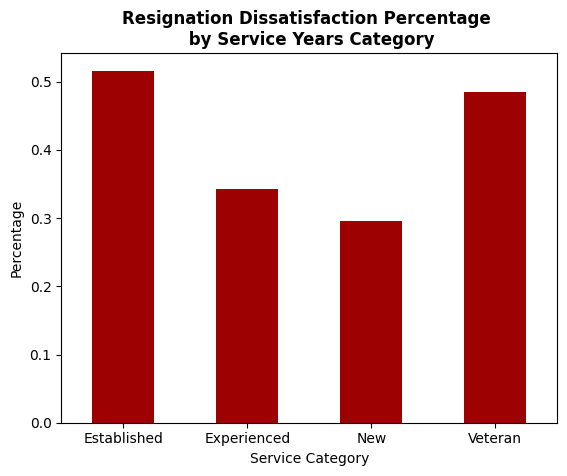

In [893]:
# Create graph for the resignations dissatisfaction percentage pivot table
%matplotlib inline
# Shows graph in same window
dissatisfied_pct.plot(kind='bar', color='#9E0101')
plt.title('Resignation Dissatisfaction Percentage \n by Service Years Category', weight='bold', fontsize=12)
plt.xlabel('Service Category')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend().set_visible(False)
plt.show()

Established employees (7-10 years of experience) had the highest percentage of dissatisfaction at 51.6% followed by veteran employees (11+ years of experience) at 48.5%. New employees (under three years of experience) had the lowest percentage of dissatisfaction at 29.5%. Experienced employees (3-7 years of experience) had 34.3%. We can conclude that employees with more than 7 years of experience are more likely to resign due to dissatisfaction than those with less than 7 years.

## Evaluate Other Missing Values
There are columns with a significant amount of missing values so I'll evaluate those and delete what I can. 

In [894]:
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 651 entries, 3 to 701
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    651 non-null    float64
 1   separationtype        651 non-null    object 
 2   cease_date            635 non-null    float64
 3   position              598 non-null    object 
 4   employment_status     597 non-null    object 
 5   gender                592 non-null    object 
 6   age                   596 non-null    object 
 7   institute_service     563 non-null    object 
 8   dissatisfied          643 non-null    object 
 9   institute             651 non-null    object 
 10  institute_service_up  563 non-null    float64
 11  service_cat           563 non-null    object 
dtypes: float64(3), object(9)
memory usage: 66.1+ KB


In [895]:
combined_updated['employment_status'].value_counts(dropna=False)

employment_status
Permanent Full-time    256
Permanent Part-time    150
Temporary Full-time    120
NaN                     54
Temporary Part-time     37
Contract/casual         29
Casual                   5
Name: count, dtype: int64

In [896]:
# Find rows where employment status is missing
combined_updated.loc[combined_updated['employment_status'].isna()]

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute,institute_service_up,service_cat
399,4.000000e+02,Resignation-Other employer,2013.0,Cleaner,NaN,Male,56-60,NaN,True,DETE,NaN,NaN
405,4.060000e+02,Resignation-Other reasons,2012.0,Teacher,NaN,NaN,NaN,NaN,False,DETE,NaN,NaN
489,4.900000e+02,Resignation-Other reasons,2012.0,Cleaner,NaN,Female,46-50,NaN,False,DETE,NaN,NaN
821,8.230000e+02,Resignation-Move overseas/interstate,2013.0,Teacher Aide,NaN,NaN,NaN,NaN,False,DETE,NaN,NaN
3,6.341399e+17,Resignation,2010.0,NaN,NaN,NaN,NaN,NaN,False,TAFE,NaN,NaN
16,6.341770e+17,Resignation,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,TAFE,NaN,NaN
18,6.341779e+17,Resignation,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,TAFE,NaN,NaN
19,6.341820e+17,Resignation,2010.0,NaN,NaN,NaN,NaN,NaN,False,TAFE,NaN,NaN
20,6.341821e+17,Resignation,2010.0,NaN,NaN,NaN,NaN,NaN,True,TAFE,NaN,NaN
21,6.341831e+17,Resignation,2010.0,NaN,NaN,NaN,NaN,NaN,False,TAFE,NaN,NaN


## Deleting Irrelevant Rows
All rows that have a missing value for employment status are also missing service years so I'll drop those. Gender and position have a few missing values, but that doesn't affect the analysis so I'll ignore those. There are some missing cease dates and service years, but they do have ages so I'll leave those for later analysis. There are a couple ages missing, but only one is missing service years as well so I'll drop that row.

In [897]:
# Delete rows where employment status is missing
combined_updated = combined_updated.dropna(subset=['employment_status'])

In [898]:
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 597 entries, 3 to 701
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    597 non-null    float64
 1   separationtype        597 non-null    object 
 2   cease_date            584 non-null    float64
 3   position              594 non-null    object 
 4   employment_status     597 non-null    object 
 5   gender                590 non-null    object 
 6   age                   594 non-null    object 
 7   institute_service     563 non-null    object 
 8   dissatisfied          597 non-null    object 
 9   institute             597 non-null    object 
 10  institute_service_up  563 non-null    float64
 11  service_cat           563 non-null    object 
dtypes: float64(3), object(9)
memory usage: 60.6+ KB


In [899]:
# Find rows where cease date is missing
combined_updated.loc[combined_updated['cease_date'].isna()]

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute,institute_service_up,service_cat
683,6.850000e+02,Resignation-Other employer,NaN,Teacher,Permanent Full-time,Male,21-25,NaN,True,DETE,NaN,NaN
694,6.960000e+02,Resignation-Other reasons,NaN,Teacher Aide,Casual,Female,46-50,NaN,False,DETE,NaN,NaN
704,7.060000e+02,Resignation-Other reasons,NaN,Teacher Aide,Permanent Full-time,Female,41-45,NaN,False,DETE,NaN,NaN
709,7.110000e+02,Resignation-Other employer,NaN,Teacher,Permanent Full-time,Female,51-55,NaN,True,DETE,NaN,NaN
724,7.260000e+02,Resignation-Other reasons,NaN,Teacher,Permanent Full-time,Female,46-50,NaN,False,DETE,NaN,NaN
770,7.720000e+02,Resignation-Other reasons,NaN,Cleaner,Permanent Part-time,Female,61 or older,NaN,False,DETE,NaN,NaN
774,7.760000e+02,Resignation-Other employer,NaN,Teacher Aide,Permanent Part-time,Female,41-45,NaN,False,DETE,NaN,NaN
788,7.900000e+02,Resignation-Other employer,NaN,Teacher,Permanent Full-time,Female,41-45,NaN,False,DETE,NaN,NaN
791,7.930000e+02,Resignation-Other reasons,NaN,Public Servant,Permanent Part-time,Female,46-50,NaN,True,DETE,NaN,NaN
797,7.990000e+02,Resignation-Move overseas/interstate,NaN,Public Servant,Permanent Part-time,Female,36-40,NaN,False,DETE,NaN,NaN


In [900]:
# Find rows where age is missing
combined_updated.loc[combined_updated['age'].isna()]

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute,institute_service_up,service_cat
214,215.0,Resignation-Other reasons,2012.0,School Administrative Staff,Permanent Part-time,Female,NaN,13.0,False,DETE,13.0,Veteran
285,286.0,Resignation-Move overseas/interstate,2012.0,Cleaner,Permanent Full-time,Female,NaN,0.0,False,DETE,0.0,New
802,804.0,Resignation-Move overseas/interstate,2013.0,Teacher Aide,Permanent Part-time,NaN,NaN,NaN,False,DETE,NaN,NaN


In [901]:
# Delete rows where both age and service category are missing
combined_updated = combined_updated[(combined_updated['age'].notna()) | (combined_updated['service_cat'].notna())]

In [902]:
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 596 entries, 3 to 701
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    596 non-null    float64
 1   separationtype        596 non-null    object 
 2   cease_date            583 non-null    float64
 3   position              593 non-null    object 
 4   employment_status     596 non-null    object 
 5   gender                590 non-null    object 
 6   age                   594 non-null    object 
 7   institute_service     563 non-null    object 
 8   dissatisfied          596 non-null    object 
 9   institute             596 non-null    object 
 10  institute_service_up  563 non-null    float64
 11  service_cat           563 non-null    object 
dtypes: float64(3), object(9)
memory usage: 60.5+ KB


In [903]:
# Find rows where the updated institute service is missing
combined_updated.loc[combined_updated['institute_service_up'].isna()]

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute,institute_service_up,service_cat
16,17.0,Resignation-Other reasons,2012.0,Teacher Aide,Permanent Part-time,Male,61 or older,NaN,True,DETE,NaN,NaN
39,40.0,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Female,21-25,NaN,True,DETE,NaN,NaN
106,107.0,Resignation-Other reasons,2012.0,Teacher Aide,Temporary Part-time,Female,46-50,NaN,True,DETE,NaN,NaN
140,141.0,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,51-55,NaN,False,DETE,NaN,NaN
196,197.0,Resignation-Other reasons,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,NaN,False,DETE,NaN,NaN
288,289.0,Resignation-Move overseas/interstate,2013.0,Public Servant,Permanent Full-time,Female,26-30,NaN,True,DETE,NaN,NaN
291,292.0,Resignation-Other employer,2013.0,Teacher Aide,Permanent Part-time,Female,56-60,NaN,False,DETE,NaN,NaN
293,294.0,Resignation-Move overseas/interstate,2012.0,Schools Officer,Permanent Part-time,NaN,61 or older,NaN,False,DETE,NaN,NaN
301,302.0,Resignation-Other employer,2012.0,School Administrative Staff,Permanent Part-time,Female,46-50,NaN,False,DETE,NaN,NaN
343,344.0,Resignation-Other employer,2012.0,School Administrative Staff,Permanent Part-time,Female,41-45,NaN,False,DETE,NaN,NaN


## Check Service Categories and Percent Dissatisfaction
Verify that the columns I deleted didn't affect the percent of dissatisfied employees I found earlier which it didn't. This means that the graph I made earlier is still accurate. 

In [904]:
# Create a function that categorizes ranges of service years into groups
def transform_service_year(val):
    if val >= 11:
        return 'Veteran'
    elif 7 <= val <= 10:
        return 'Established'
    elif 3 <= val <= 6:
        return 'Experienced'
    elif pd.isnull(val):
        return np.nan
    else:
        return 'New'
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(transform_service_year)

# Find values in the new service_cat column of combined dataframe
combined_updated['service_cat'].value_counts(dropna=False)

service_cat
New            193
Experienced    172
Veteran        136
Established     62
NaN             33
Name: count, dtype: int64

In [905]:
# Find percentage of dissatisfied employees by service years
dissatisfied_pct = combined_updated.pivot_table(index='service_cat', values='dissatisfied') # Index gives each unique row a category in table
dissatisfied_pct # Shows resignation pivot table

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.343023
New,0.295337
Veteran,0.485294


## Find number of dissatisfied employees in each service category
I have already found the percentage, but I will also find the actual number of employees for each group.

In [906]:
# Find number of dissatisfied employee resignations by service years
dissatisfied_count = combined_updated.pivot_table(index='service_cat', 
                                   columns='dissatisfied', 
                                   aggfunc='count', 
                                   values='id')
dissatisfied_count

dissatisfied,False,True
service_cat,,
Established,30,32
Experienced,113,59
New,136,57
Veteran,70,66


There are 66 Veteran employees, 32 Established employees, 59 Experienced employees, and 57 New employees that resigned due to dissatisfaction.

## Evaluate the Age Column
The stakeholders wanted to know if age was related to resignations so I'll analyze that as well. They are grouped by increments of five years in both the DETE and TAFE data sets which I'll leave as the age groups, but they were written in different formats so I'll clean that up before analyzing. The data sets have different values for their eldest age and up category so I'll fix that as well. 

In [907]:
# Find ages in combined updated dataframe
combined_updated['age'].value_counts(dropna=False).sort_index()

age
20 or younger    10
21  25           33
21-25            29
26  30           32
26-30            35
31  35           32
31-35            29
36  40           32
36-40            41
41  45           45
41-45            48
46  50           39
46-50            41
51-55            71
56 or older      29
56-60            25
61 or older      23
NaN               2
Name: count, dtype: int64

In [908]:
# Clean the age column
combined_updated['age'] = combined_updated['age'].str.replace('  ', '-')
combined_updated['age'] = combined_updated['age'].replace('56-60', '56 or older') # Recategorize 55-60 age group
combined_updated['age'] = combined_updated['age'].replace('61 or older', '56 or older') # Recategorize 61 or older age group
combined_updated['age'].value_counts(dropna=False).sort_index()

age
20 or younger    10
21-25            62
26-30            67
31-35            61
36-40            73
41-45            93
46-50            80
51-55            71
56 or older      77
NaN               2
Name: count, dtype: int64

In [909]:
# Find number of dissatisfied employee resignations by age
dissatisfied_age_count = combined_updated.pivot_table(index='age', 
                                   columns='dissatisfied', 
                                   aggfunc='count', 
                                   values='id')
dissatisfied_age_count

dissatisfied,False,True
age,,
20 or younger,8,2
21-25,43,19
26-30,39,28
31-35,38,23
36-40,48,25
41-45,58,35
46-50,49,31
51-55,41,30
56 or older,45,32


In [910]:
# Find percentage of dissatisfied employee resignations by age
dissatisfied_age_pct = combined_updated.pivot_table(index='age', values='dissatisfied') # Index gives each unique row a category in table
dissatisfied_age_pct # Shows resignation pivot table

,dissatisfied
age,
20 or younger,0.1
21-25,0.306452
26-30,0.41791
31-35,0.377049
36-40,0.342466
41-45,0.376344
46-50,0.3875
51-55,0.422535
56 or older,0.415584


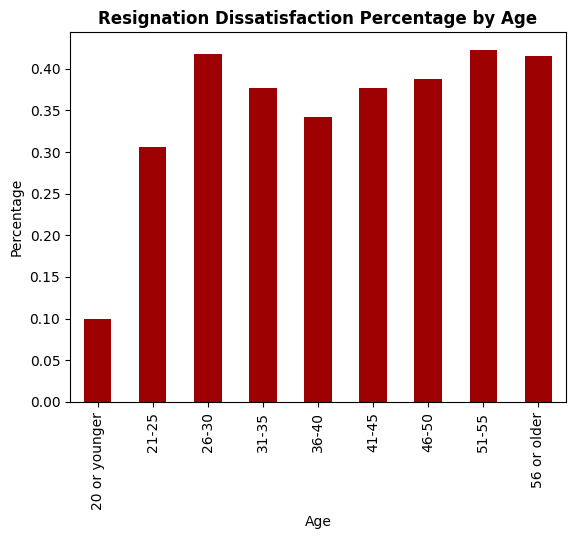

In [911]:
# Create graph for the age percentage pivot table
dissatisfied_age_pct.plot(kind='bar', color='#9E0101')
plt.title('Resignation Dissatisfaction Percentage by Age', weight='bold', fontsize=12)
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.legend().set_visible(False)
plt.show()

There is a wide range for the dissatisfaction percentage by age. Ages 51-55 had the highest amount of resignations due to dissatisfaction at 42.3% and ages 20 or younger were the lowest at 10.0%. The graph is interesting. It shows a sharp increase for the first three age groups then declines before rising again until the final age category. Of note, the final age category is a much larger age range than the other groupings. 

## Analyze DETE and TAFE Separately
I'll compare the percent of dissatisfied employee resignations by institute to compare the two institutes data.

In [912]:
# Find number of dissatisfied employee resignations by institute
dissatisfied_institute_count = combined_updated.pivot_table(index='institute', 
                                   columns='dissatisfied', 
                                   aggfunc='count', 
                                   values='id')
dissatisfied_institute_count

dissatisfied,False,True
institute,,
DETE,158,148
TAFE,213,77


In [913]:
# Find percent of dissatisified employee resignations by institute
dissatisfied_institute_pct = (dissatisfied_institute_count[True] / dissatisfied_institute_count.sum(axis=1)) * 100 # sum(axis=1) counts the rows
dissatisfied_institute_pct

institute
DETE    48.366013
TAFE    26.551724
dtype: float64

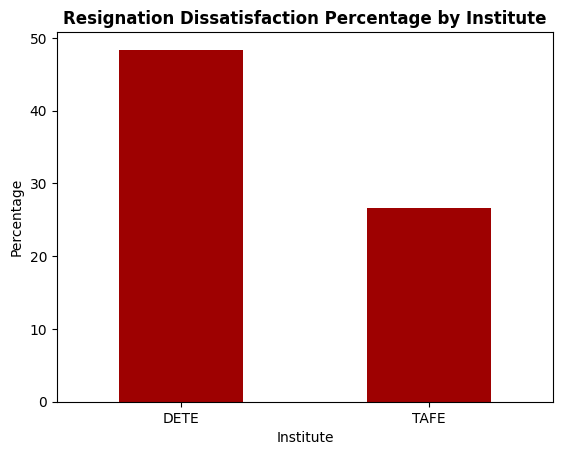

In [914]:
# Create graph for the institute percentage of dissatisfied resignations
dissatisfied_institute_pct.plot(kind='bar', color='#9E0101')
plt.title('Resignation Dissatisfaction Percentage by Institute', weight='bold', fontsize=12)
plt.xlabel('Institute')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

Resignation due to dissatisfaction was higher at DETE than TAFE, 48.4% versus 26.6% respectively.

## Display Findings
I have found the number of dissatisfied employee resignations by age and years of service so I'll show my findings in graphs. I'll include the employees that resigned that were not dissatisfied for comparison.

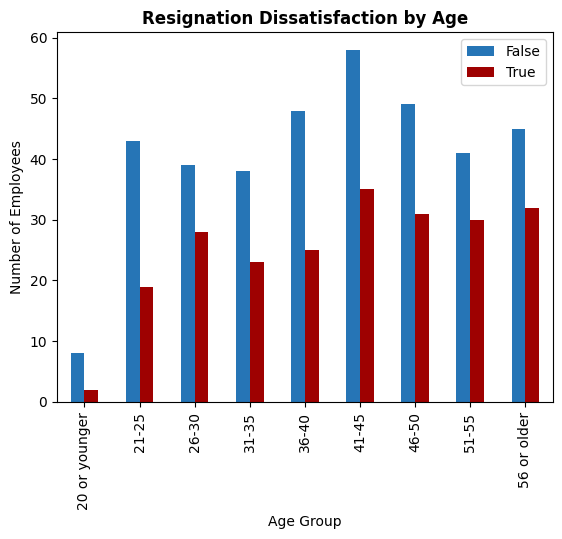

In [915]:
# Create graph for dissatisfaction by age

dissatisfied_age_count.plot(kind='bar', color=['#2675B6', '#9E0101'])
plt.title('Resignation Dissatisfaction by Age', weight='bold', fontsize=12)
plt.xlabel('Age Group')
plt.ylabel('Number of Employees')
plt.xticks(rotation=90)
plt.legend().set_visible(True)
plt.show()

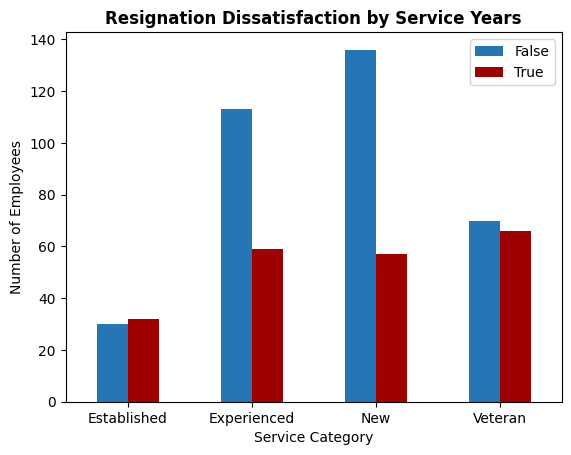

In [916]:
# Create graph for the resignations count
dissatisfied_count.plot(kind='bar', color=['#2675B6', '#9E0101'])
plt.title('Resignation Dissatisfaction by Service Years', weight='bold', fontsize=12)
plt.xlabel('Service Category')
plt.ylabel('Number of Employees')
plt.xticks(rotation=0)
plt.legend().set_visible(True)
plt.show()

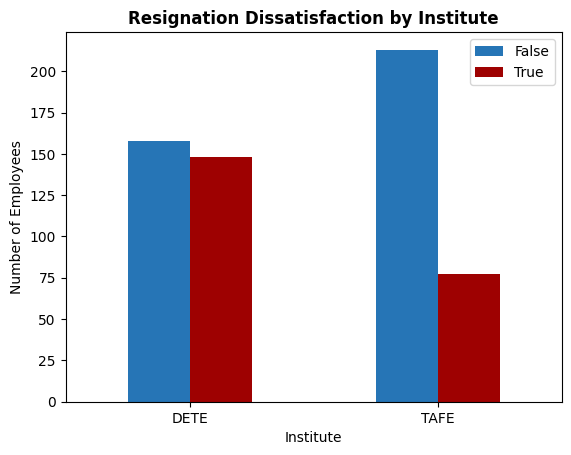

In [917]:
# Create graph for the institute resignations count
dissatisfied_institute_count.plot(kind='bar', color=['#2675B6', '#9E0101'])
plt.title('Resignation Dissatisfaction by Institute', weight='bold', fontsize=12)
plt.xlabel('Institute')
plt.ylabel('Number of Employees')
plt.xticks(rotation=0)
plt.legend().set_visible(True)
plt.show()

# Conclusion
Stakeholders wanted to know whether employees who only worked at their institute for a short period of time resign due to some kind of dissatisfaction or not, whether employees who have worked there longer resign due to dissatisfaction, and whether the age of employees resigning is related to dissatisfaction or not.

I found that a higher percentage of employees who resigned from DETE were dissatisfied than from TAFE, employees with more than 7 years of experience at either insitute are more likely to resign due to dissatisfaction than those with less than 7 years, and employees younger than 26 are less likely to leave due to dissatisfaction.